# Logistics Regression

## 1. Importing the libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, accuracy_score

## 2. Importing the dataset

In [32]:
dataset = pd.read_csv('wine_updated.csv')
x = dataset[['Alcohol', 'Ash']].values
y = dataset['Class'].values

## 3. Split the dataset into training and testing sets

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## 3. Feature scaling

In [35]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## 4. Train the logistic regression model

In [36]:
log_class = LogisticRegression(random_state=0)
y_train = y_train.ravel()
log_class.fit(x_train, y_train)

LogisticRegression(random_state=0)

## 5. Make predictions on test data

In [38]:
y_pred = log_class.predict(x_test)

## 6. Evaluate the model

In [39]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: ')
print(cm)

Confusion Matrix: 
[[13  0  1]
 [ 0 14  0]
 [ 4  1  3]]


In [40]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy*100))

Accuracy: 83.33%


## 7. Visualize the decision boundary for training set

In [41]:
x1_range = np.arange(start=x_train[:, 0].min()-1, stop=x_train[:, 0].max()+1, step=0.01)
x2_range = np.arange(start=x_train[:, 1].min()-1, stop=x_train[:, 1].max()+1, step=0.01)
x1, x2 = np.meshgrid(x1_range, x2_range)

In [43]:
grid_points = np.c_[x1.ravel(), x2.ravel()]
grid_predict = log_class.predict(grid_points).reshape(x1.shape)

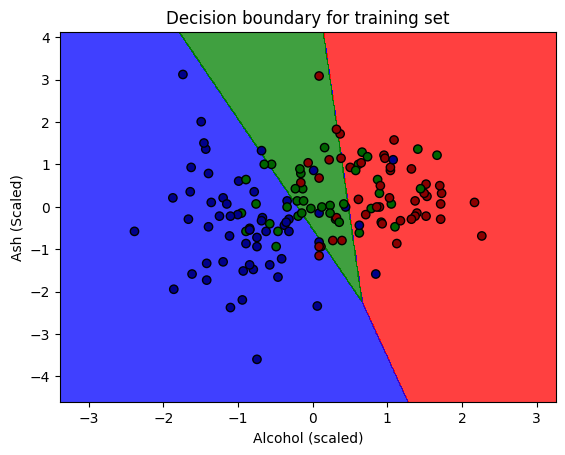

In [44]:
plt.contourf(x1, x2, grid_predict, alpha=0.75, cmap=ListedColormap(['red', 'blue', 'green']))
plt.scatter(x_train[: ,0], x_train[:, 1], c=y_train, cmap=ListedColormap(['darkred', 'darkblue', 'darkgreen']), edgecolors='k')
plt.title('Decision boundary for training set')
plt.xlabel('Alcohol (scaled)')
plt.ylabel('Ash (Scaled)')
plt.show()

## 8. Visualize the decision boundary for the test set

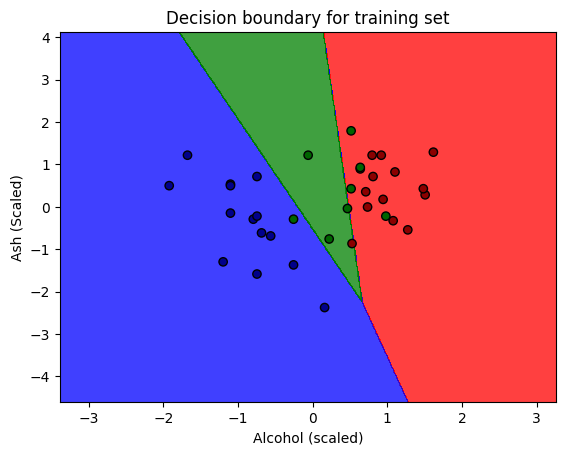

In [47]:
grid_predict_test = log_class.predict(grid_points).reshape(x1.shape)
plt.contourf(x1, x2, grid_predict_test, alpha=0.75, cmap=ListedColormap(['red', 'blue', 'green']))
plt.scatter(x_test[: ,0], x_test[:, 1], c=y_test, cmap=ListedColormap(['darkred', 'darkblue', 'darkgreen']), edgecolors='k')
plt.title('Decision boundary for training set')
plt.xlabel('Alcohol (scaled)')
plt.ylabel('Ash (Scaled)')
plt.show()

## 9. Predict on new data

In [48]:
new_predict = np.array([[14, 2.7], [12.6, 3.8], [13.4, 2.4]])
scaled_new_predict = sc.transform(new_predict)
new_result = log_class.predict(scaled_new_predict)
print('Prediction for new data: ', new_result)

Prediction for new data:  [1 3 1]
